# Linear-Decoder Autoencoder and PCA

In this notebook we wish to compare the latent spaces created by a linear-decoder autoencoder and PCA. With linear decoder we mean that the decoder is kept linear while the encoder can be comprised of non-linear functions. We train 3 different models: (i) An autoencoder with linear encoder and decoder. (ii) An autoencoder with sigmoid activations in the encoder and a linear decoder. (iii) A PCA model. For all models, we will reduce the dimension of the data to $R^3$ so that we can visualize it.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# import the breast cancer dataset
diagnoses = pd.read_csv('../representation_learning/testing_methods/datasets/breast_cancer.csv')

# select columns for training and testing
X = diagnoses[diagnoses.columns[2:]]
y = diagnoses['diagnosis']

# normalize the data
X = (X - X.mean()) / X.std()

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
293,-0.646215,-0.425397,-0.676120,-0.631373,-0.898760,-0.907375,-0.776712,-0.673125,0.231198,-0.799904,...,-0.663983,0.011841,-0.681830,-0.637180,0.198464,-0.498708,-0.673884,-0.353041,0.323667,-0.768264
332,-0.824986,0.132608,-0.824275,-0.760382,0.642750,-0.692086,-1.051098,-1.065286,0.468301,-0.356584,...,-0.887435,0.016722,-0.903242,-0.780676,0.439349,-1.001516,-1.240692,-1.435918,0.632391,-1.036794
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
278,-0.152464,-0.337046,-0.235773,-0.234685,-1.200237,-1.208439,-0.863390,-0.941662,-0.870417,-1.076093,...,-0.159146,0.068786,-0.248529,-0.248496,-1.198672,-1.131620,-0.796592,-0.954724,-0.914464,-1.180195
489,0.727206,0.211659,0.622700,0.576024,-1.520911,-0.629033,-0.656165,-0.666166,0.125414,-1.352283,...,0.602248,0.143628,0.596347,0.357275,-1.378241,0.239836,-0.117381,-0.414350,2.871047,-0.427202


## Linear Autoencoder

The first model is a fully-linear autoencoder. We set the size of the hidden space to be 3 and train it with the Adam optimizer and MSE loss. The choice for number of epochs was made based on the point in which validation loss stabilized.

In [2]:
from keras import layers
from keras.models import Sequential
from keras.losses import MeanSquaredError
from keras.models import Model
import numpy as np
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# our first model is a fully-linear autoencoder
linear_autoencoder = Sequential(
    [
        layers.Input(30),
        layers.Dense(3, activation=None, name='hidden'),
        layers.Dense(30, activation=None, name='output')
    ]
)

# compile the model with the optimizer and loss
linear_autoencoder.compile(optimizer='adam', loss=MeanSquaredError())

# train the autoencoder for 150 epochs
linear_autoencoder.fit(X_train, X_train,
                       epochs=150,
                       batch_size=32,
                       shuffle=True,
                       validation_data=(X_test, X_test),
                       verbose=0)

# we now define the linear encoder that will be used to obtain the latent space
linear_encoder = Model(
    inputs=linear_autoencoder.inputs,
    outputs=linear_autoencoder.get_layer(name='hidden').output,
)

## Non-Linear Autoencoder

The non-linear autoencoder has a non-linear encoder and  a linear decoder. The training was also made with Adam and with MSE loss. For this architecture, we needed to train for longer to obtain a stable validation loss.


In [3]:
# our second model is an autoencoder with non-linear encoder and linear decoder
non_linear_autoencoder = Sequential(
    [
        layers.Input(30),
        layers.Dense(3, activation='sigmoid', name='hidden'),
        layers.Dense(30, activation=None, name='output')
    ]
)

# compile the model with the optimizer and loss
non_linear_autoencoder.compile(optimizer='adam', loss=MeanSquaredError())

# train the autoencoder for 500 epochs
non_linear_autoencoder.fit(X_train, X_train,
                       epochs=500,
                       batch_size=32,
                       shuffle=True,
                       validation_data=(X_test, X_test),
                       verbose=0)

# we now define the linear encoder that will be used to obtain the latent space
non_linear_encoder = Model(
    inputs=non_linear_autoencoder.inputs,
    outputs=non_linear_autoencoder.get_layer(name='hidden').output,
)

## Principal Component Analysis

PCA is used as our baseline in here and the implementation is made through the scikit-learn library. The model is trained to reduce the dimensions of the data to the same 3 dimensions as the autoencoders.

In [4]:
from sklearn.decomposition import PCA

# train the PCA model
pca = PCA(n_components=3).fit(X_train)

## Comparing Latent Spaces' Distributions

We now compare the latent spaces generated through each of the 3 architectures. We compare the latent spaces in terms of the distribution and shape of the data (through graphical tools) and we also use the latent spaces to try to predict labels $y$ and compare their performance.

In [5]:
# get the latent representations of the data
X_linear_ae = linear_encoder.predict(X).T
X_non_linear_ae = non_linear_encoder.predict(X).T
X_pca = pca.transform(X).T

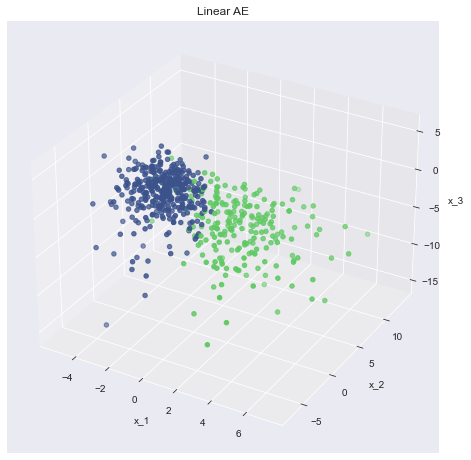

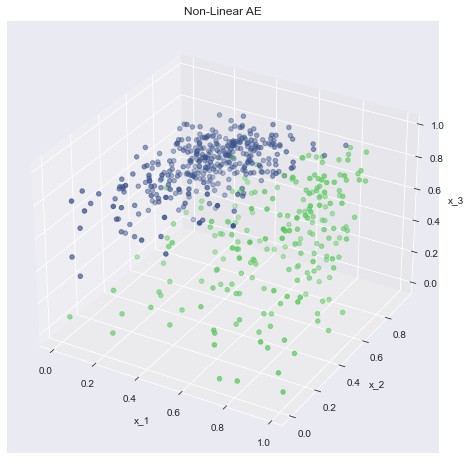

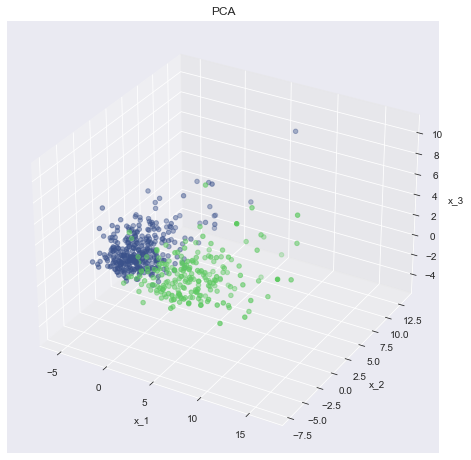

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib.colors import ListedColormap

# convert classes into a format that can be used as a hue
labels = y == 'M'

# plot the latent spaces colored by class
for latent_space, name in zip([X_linear_ae, X_non_linear_ae, X_pca],
                              ['Linear AE', 'Non-Linear AE', 'PCA']):

    # figure setup and visual features
    fig = plt.figure(figsize=(7,6))
    ax = Axes3D(fig)
    viridis_map = ListedColormap(sns.color_palette('viridis', 3))

    # plot the data in a 3D grid
    ax.scatter(latent_space[0], latent_space[1], latent_space[2], c=labels,  marker='o', cmap=viridis_map)
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.set_zlabel('x_3')
    ax.set_title(name)

    # display and save figure
    plt.savefig(f'figures/latent_space_{name}.png', dpi=200)
    plt.show()

## Comparing Latent Spaces' Predictivity

We now use 4 different classifiers with the latent spaces to evaluate which of them is the best to classify different classes. From the previous figures, we notice that all of them split the data quite well.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

def apply_classifiers(latent_x_train, latent_x_test):

    # using KNNs for classification
    knn = KNeighborsClassifier(n_neighbors=20).fit(latent_x_train, y_train)
    print("KNN test score:", knn.score(latent_x_test, y_test))
    print("KNN train score:", knn.score(latent_x_train, y_train))

    # using SVMs for classification
    svm = SVC().fit(latent_x_train, y_train)
    print("SVM test score:", svm.score(latent_x_test, y_test))
    print("SVM train score:", svm.score(latent_x_train, y_train))

    # using random forests for classification
    rfc = RandomForestClassifier(max_depth=5, random_state=0).fit(latent_x_train, y_train)
    print("RF test score:", rfc.score(latent_x_test, y_test))
    print("RF train score:", rfc.score(latent_x_train, y_train))

    # using logistic regression for classification
    lrc = LogisticRegression(random_state=0).fit(latent_x_train, y_train)
    print("LR test score:", lrc.score(latent_x_test, y_test))
    print("LR train score:", lrc.score(latent_x_train, y_train))

    return [knn.score(latent_x_test, y_test), svm.score(latent_x_test, y_test),
            rfc.score(latent_x_test, y_test), lrc.score(latent_x_test, y_test)]

In [8]:
# get the train and test latent spaces
x_train_linear_ae = linear_encoder.predict(X_train)
x_test_linear_ae = linear_encoder.predict(X_test)
x_train_non_linear_ae = non_linear_encoder.predict(X_train)
x_test_non_linear_ae = non_linear_encoder.predict(X_test)
x_train_pca = pca.transform(X_train)
x_test_pca = pca.transform(X_test)

results = []

# apply the classifiers for each model
for train, test, name in zip([x_train_linear_ae, x_train_non_linear_ae, x_train_pca],
                             [x_test_linear_ae, x_test_non_linear_ae, x_test_pca],
                             ['Linear AE', 'Non-Linear AE', 'PCA']):
    print('\n' + name)
    results.append(apply_classifiers(train, test))


Linear AE
KNN test score: 0.916083916083916
KNN train score: 0.9389671361502347
SVM test score: 0.9230769230769231
SVM train score: 0.9577464788732394
RF test score: 0.9440559440559441
RF train score: 0.9859154929577465
LR test score: 0.9300699300699301
LR train score: 0.9624413145539906

Non-Linear AE
KNN test score: 0.9300699300699301
KNN train score: 0.9366197183098591
SVM test score: 0.9370629370629371
SVM train score: 0.9577464788732394
RF test score: 0.9090909090909091
RF train score: 0.9671361502347418
LR test score: 0.9440559440559441
LR train score: 0.9436619718309859

PCA
KNN test score: 0.9230769230769231
KNN train score: 0.9413145539906104
SVM test score: 0.916083916083916
SVM train score: 0.9577464788732394
RF test score: 0.9300699300699301
RF train score: 0.9765258215962441
LR test score: 0.9300699300699301
LR train score: 0.960093896713615


In [9]:
# create table with results
results_table = pd.DataFrame(np.array(results).T, columns=['Linear AE', 'Non-Linear AE', 'PCA'])
results_table.index = ['KNN', 'SVM', 'RF', 'LR']
results_table

,Linear AE,Non-Linear AE,PCA
KNN,0.916084,0.930070,0.923077
SVM,0.923077,0.937063,0.916084
RF,0.944056,0.909091,0.930070
LR,0.930070,0.944056,0.930070
